## Observations and Insights 

#1. The bar graph shows that out of 10 drugs, Drug Regimen Capomulin has the maximum Timepoints while Propriva has the lowest timepoints.
#2. The correlation between mouse weight and average tumor volume is 0.84. The Linear plot indicates that if weight increases , tumor also increases. Also Outliers only existed for Infubinol.
#3. From the selected treatments,  Capomulin and Ramicane reduces the size of tumors better.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
CompletePD = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
CompletePD.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
num_of_mice = CompletePD["Mouse ID"].nunique()
print(f"Number of Mice in total :  {num_of_mice}")
# num_of_mice
CompletePD.loc[(CompletePD.duplicated(subset =["Mouse ID", "Timepoint"],  keep =False))]

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatedMouseId = CompletePD.loc[CompletePD.duplicated(subset =["Mouse ID", "Timepoint"],  keep =False), "Mouse ID"].unique()
duplicatedMouseId

Number of Mice in total :  249


array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanCompleteData  = CompletePD.loc[CompletePD["Mouse ID"].isin(duplicatedMouseId) == False]
#Created clean complete DataFrame
cleanCompleteData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
#Rtrieving total mice from clean data
clean_num_of_mice = cleanCompleteData["Mouse ID"].nunique()
print(f"Number of Mice in total after removing duplicate entries :  {clean_num_of_mice}")


Number of Mice in total after removing duplicate entries :  248


## Summary Statistics

In [6]:
#The mean of the tumor volume for each regimen is calculated using
summarymean = cleanCompleteData.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
#The median of the tumor volume for each regimen is calculated using 
summarymedian = cleanCompleteData.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
#The variance of the tumor volume for each regimen is calculated using groupby. 
summaryvar = cleanCompleteData.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
#The standard deviation of the tumor volume for each regimen is calculated using groupby.
summarystd = cleanCompleteData.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
#The SEM of the tumor volume for each regimen is calculated using groupby. 
summarysem = cleanCompleteData.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
#A new DataFrame is created with using the summary statistics. 
pd.DataFrame({"Mean" : summarymean , "Median" : summarymedian, "Variance" : summaryvar, "Standerd Variation":summarystd, "SEM" : summarysem})


,Mean,Median,Variance,Standerd Variation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
cleanCompleteData.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

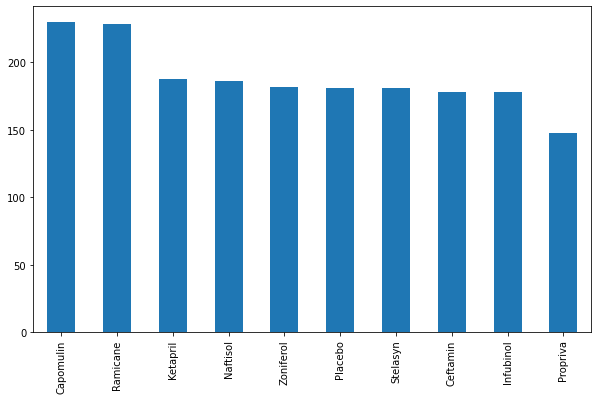

In [8]:
#A bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas is generated. 
drugregcount = cleanCompleteData["Drug Regimen"].value_counts()
drugregcount.plot.bar(figsize = (10,6))


<BarContainer object of 10 artists>

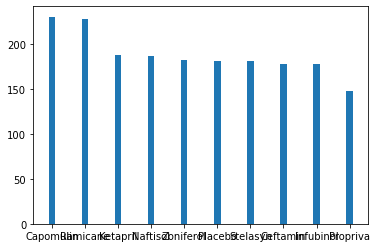

In [9]:
#A bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot is generated. 
plt.bar(drugregcount.index, drugregcount.values, width =0.2)


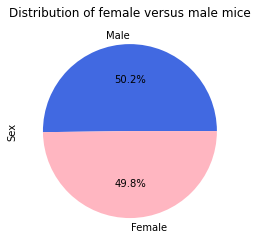

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#A pie plot showing the distribution of female versus male mice using Pandas is generated. 
totalmice = mouse_metadata.Sex.value_counts()
colors = ['Royalblue', 'LightPink']
plt.pie(totalmice, labels=["Male", "Female"], autopct='%1.1f%%', colors = colors)
plt.title('Distribution of female versus male mice')
plt.ylabel('Sex')
plt.show()

C:\Users\zanke\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


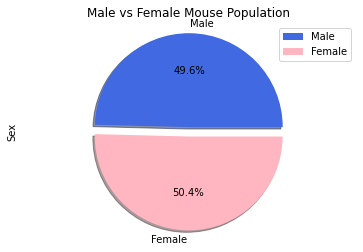

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#A pie plot showing the distribution of female versus male mice using pyplot is generated. 
gender = cleanCompleteData.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(gender.size())

# total count of Female and Male 
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))
labelsm = ["Male","Female"]
Colorsm = ["Royalblue", "LightPink"]
explode = (0, 0.1)
pl = mouse_gender.plot.pie(y='Total Count', explode=explode, labels = labelsm, colors = Colorsm, autopct='%1.1f%%' , shadow=True)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex',fontsize = 10)
plt.axis("equal",fontsize = 10)
plt.show()

## Quartiles, Outliers and Boxplots

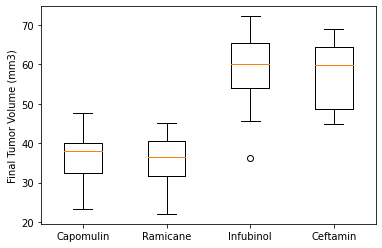

In [12]:
#A DatFrame that has the last timepoint for each mouse ID is created using groupby.
mouse_ID = CompletePD.groupby(["Mouse ID"]).max()
#The index of the DataFrame is reset.
mouse_reset = mouse_ID.reset_index()
#Retrieve the maximum timepoint for each mouse.
#  Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_data = mouse_reset[['Mouse ID','Timepoint']].merge(CompletePD,on=['Mouse ID','Timepoint'],how="left")

# Capomulin, Ramicane, Infubinol, and Ceftamin
tumvollist = mouse_data['Tumor Volume (mm3)']
def drugregimen_outliers(regimen):
    regimen_data = mouse_data.loc[mouse_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    quartiles = regimen_data.quantile([0.25,0.5,0.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)
    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    
    return regimen_data

outliersCp = drugregimen_outliers("Capomulin")

outliersRm = drugregimen_outliers("Ramicane")

outliersIn = drugregimen_outliers("Infubinol")

outliersCeft = drugregimen_outliers("Ceftamin")

#A box plot is generated that shows the distribution of the final tumor volume for all the mice in each treatment group.
plt.boxplot([outliersCp, outliersRm, outliersIn, outliersCeft],labels = ["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()



## Line and Scatter Plots

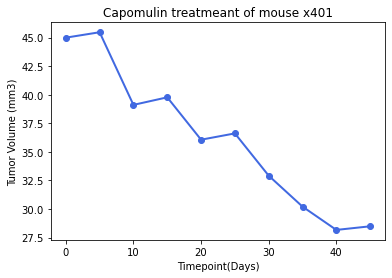

In [13]:
# A line plot is generated that shows the tumor volume vs. time point for one mouse treated with Capomulin.
regimen_data = cleanCompleteData.loc[cleanCompleteData["Drug Regimen"] == "Capomulin"]
data_by_id = regimen_data.loc[regimen_data['Mouse ID'] == "x401"]
plt.plot(data_by_id['Timepoint'], data_by_id['Tumor Volume (mm3)'], color="royalblue", marker='o', linewidth=2)
plt.xlabel('Timepoint(Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatmeant of mouse x401')
plt.show()    


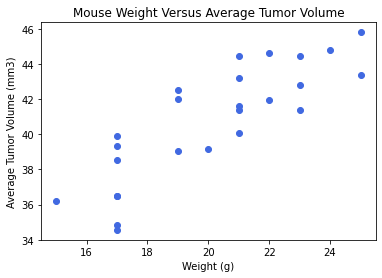

In [14]:
# A scatter plot is generated that shows average tumor volume vs. mouse weight for the Capomulin regimen
regimen_data = cleanCompleteData.loc[cleanCompleteData['Drug Regimen'] == "Capomulin"]
meanmouse = regimen_data.groupby(['Mouse ID']).mean()
plt.scatter(meanmouse['Weight (g)'], meanmouse['Tumor Volume (mm3)'], color="royalblue")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.show()


## Correlation and Regression

Correlation between mouse and average tumor is : 0.84


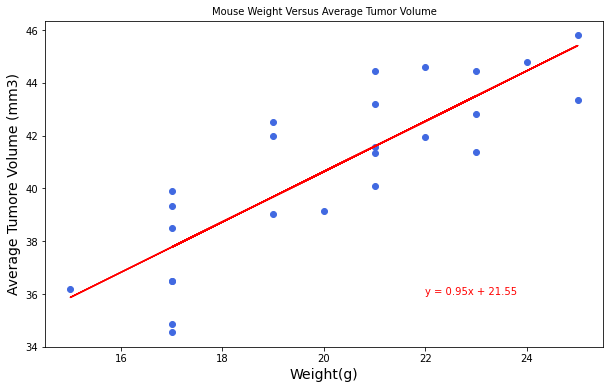

In [15]:
# Correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation =round(st.pearsonr(meanmouse['Weight (g)'],meanmouse['Tumor Volume (mm3)'])[0],2)
print(f"Correlation between mouse and average tumor is : {correlation}")
x_values = meanmouse['Weight (g)']
y_values = meanmouse['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize = (10,6))

plt.scatter(x_values,y_values, color="royalblue")
plt.plot(x_values,regress_values,"r-")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =10)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_equation, xy=(22, 36),color="red" )
plt.show()
